In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de Seaborn
sns.set(style="whitegrid")


In [ ]:
# chargement des donnees nettoyees
sales_df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Prediction de la demande des articles dans un magasin/Datasets/Donnees nettoyees/ventes_nettoyees.csv")
stock_df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Prediction de la demande des articles dans un magasin/Datasets/Donnees nettoyees/stocks_nettoyees.csv")
promotion_df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Prediction de la demande des articles dans un magasin/Datasets/Donnees nettoyees/promotions_nettoyees.csv")
weather_df = pd.read_csv("/content/drive/MyDrive/Mes projets/Projet Prediction de la demande des articles dans un magasin/Datasets/Donnees nettoyees/meteo_nettoyees.csv")



```
a. Analyse descriptive
Une première analyse descriptive pour mieux comprendre les données.
```



In [ ]:
# Analyse descriptive pour chaque DataFrame
print("Statistiques descriptives pour les ventes:")
print(sales_df.describe())

print("\nStatistiques descriptives pour les stocks:")
print(stock_df.describe())

print("\nStatistiques descriptives pour les promotions:")
print(promotion_df.describe())

print("\nStatistiques descriptives pour la météo:")
print(weather_df.describe())


Statistiques descriptives pour les ventes:
       Quantité vendue  Prix unitaire
count     14086.000000   14086.000000
mean        251.993753      99.775636
std          77.088010      50.363056
min         120.000000      12.890000
25%         186.000000      55.842500
50%         250.000000      99.535000
75%         317.000000     143.605000
max         447.000000     187.450000

Statistiques descriptives pour les stocks:
       Stock actuel  Seuil de réapprovisionnement
count    200.000000                    200.000000
mean     309.375000                     92.025000
std       99.632122                      8.804086
min      135.000000                     78.000000
25%      229.500000                     84.000000
50%      301.500000                     92.000000
75%      383.250000                     99.250000
max      487.000000                    108.000000

Statistiques descriptives pour les promotions:
       Réduction (%)
count      54.000000
mean       28.333333
std       

Visualistations

```
1. Distribution des quantites vendues
```



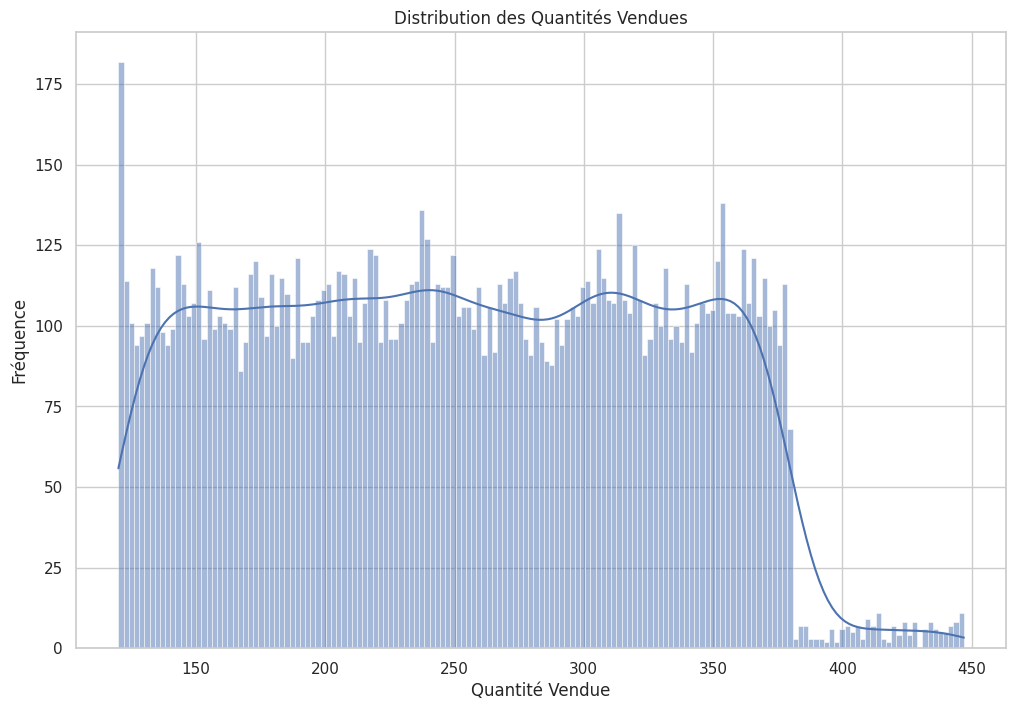

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(sales_df['Quantité vendue'], bins=int((sales_df['Quantité vendue'].max() - sales_df['Quantité vendue'].min()) / 2), kde=True)
plt.title('Distribution des Quantités Vendues')
plt.xlabel('Quantité Vendue')
plt.ylabel('Fréquence')
plt.show()

Cette visualisation presente la frequence de vente generales de tous les magazins de la villes.

```
On peut observer que dans de trait rare cas les ventes on excelles les quantite des valeures superieures ou egales a 400.

Dans ce cas cela peut encore etre considere comme outliers
```




```
2.Visualisation des ventes par magasin
```



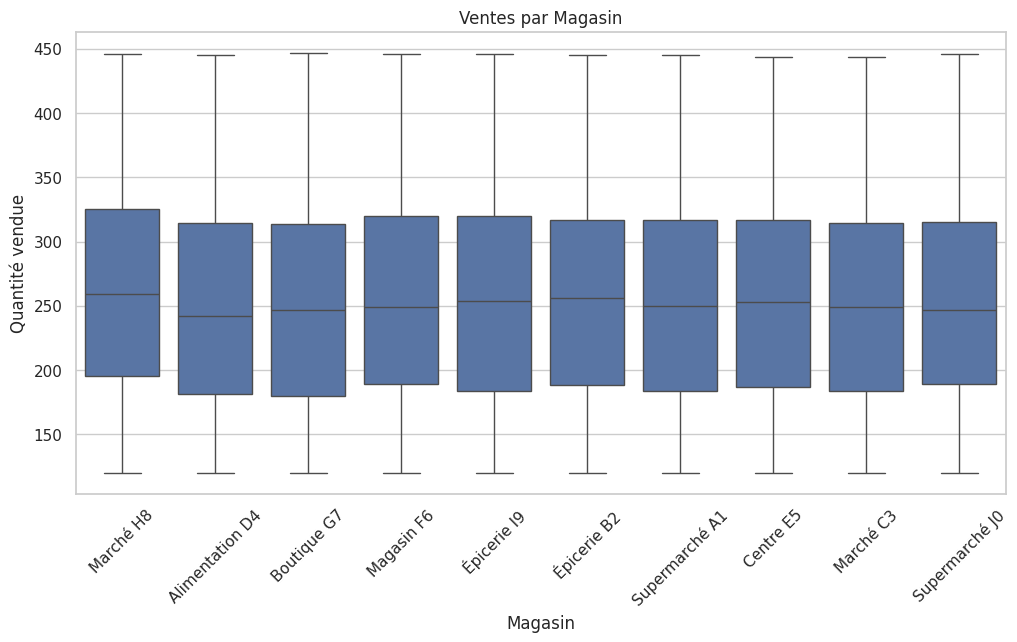

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Magasin', y='Quantité vendue', data=sales_df)
plt.title('Ventes par Magasin')
plt.xticks(rotation=45)
plt.ylabel('Quantité vendue')
plt.show()

La visualisation nous presente que les affaires marchent plutot bien dans tous les magasins :)

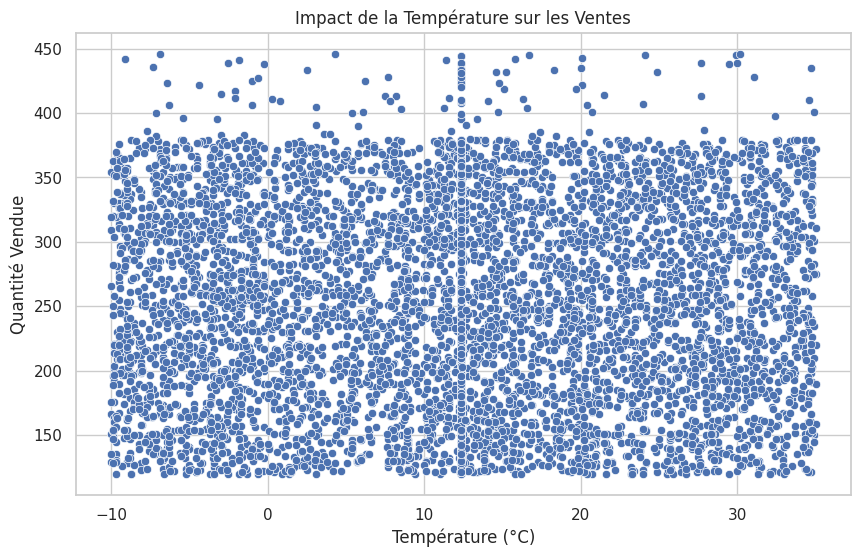

In [ ]:
# Fusionner sur la date et la ville (en supposant que chaque vente a une ville associée)
merged_data = sales_df.merge(weather_df, on=['Date', 'Ville'], how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Température (°C)', y='Quantité vendue', data=merged_data)
plt.title('Impact de la Température sur les Ventes')
plt.xlabel('Température (°C)')
plt.ylabel('Quantité Vendue')
plt.show()


Il est force de constater que la temperature n'influence en rien les ventes ce qui est une bonne nouvelle pour le business


```
3. Ventes par produit
Cette visualisation montrera comment les ventes varient selon les différents produits.
```

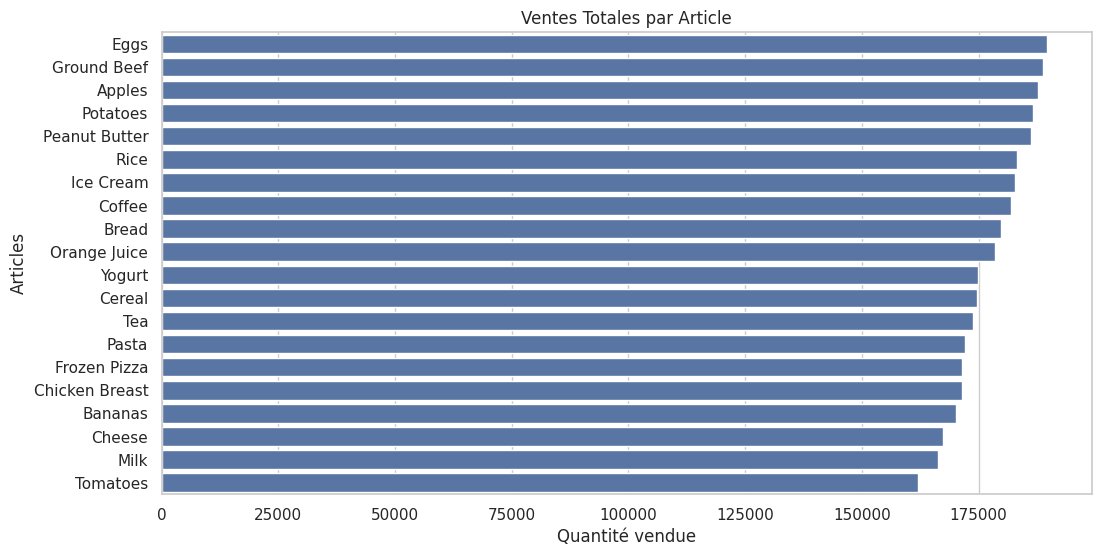

In [ ]:
sales_by_articles= sales_df.groupby('Articles')['Quantité vendue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantité vendue', y='Articles', data=sales_by_articles.sort_values('Quantité vendue', ascending=False))
plt.title('Ventes Totales par Article')
plt.xlabel('Quantité vendue')
plt.ylabel('Articles')
plt.show()


```
4. Ventes par ville
Analyse des ventes par ville afin de connaitre des différences géographiques significatives.
```



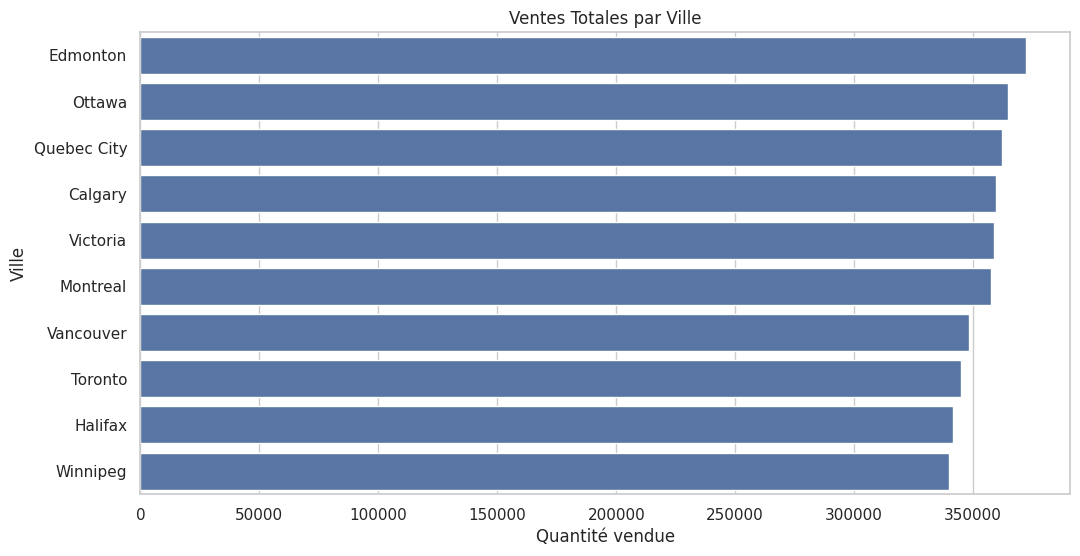

In [ ]:
sales_by_city = sales_df.groupby('Ville')['Quantité vendue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantité vendue', y='Ville', data=sales_by_city.sort_values('Quantité vendue', ascending=False))
plt.title('Ventes Totales par Ville')
plt.xlabel('Quantité vendue')
plt.ylabel('Ville')
plt.show()


```
5. Impact des promotions sur les ventes
Examinons si les promotions ont eu un impact sur les quantités vendues.
```


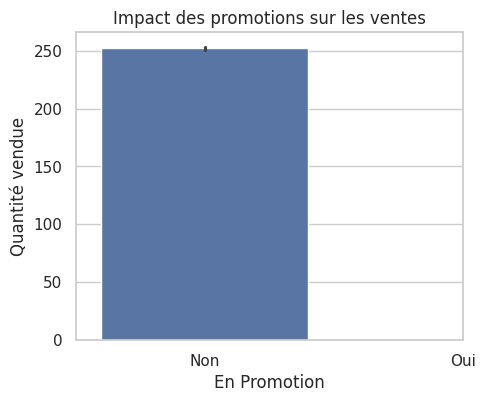

In [ ]:
#creer un colonne pour indique si une vente a eu lieu pendant une promotion
sales_df['En promotion']= sales_df['Articles'].isin(promotion_df['Produit']) & sales_df['Magasin'].isin(promotion_df['Magasin'])

plt.figure(figsize=(5, 4))
sns.barplot(x='En promotion', y='Quantité vendue', data=sales_df)
plt.title('Impact des promotions sur les ventes')
plt.xlabel('En Promotion')
plt.ylabel('Quantité vendue')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

```
6. Analyse de la saisonnalité
Examen de la tendance des ventes par mois pour identifier des schémas saisonniers.
```



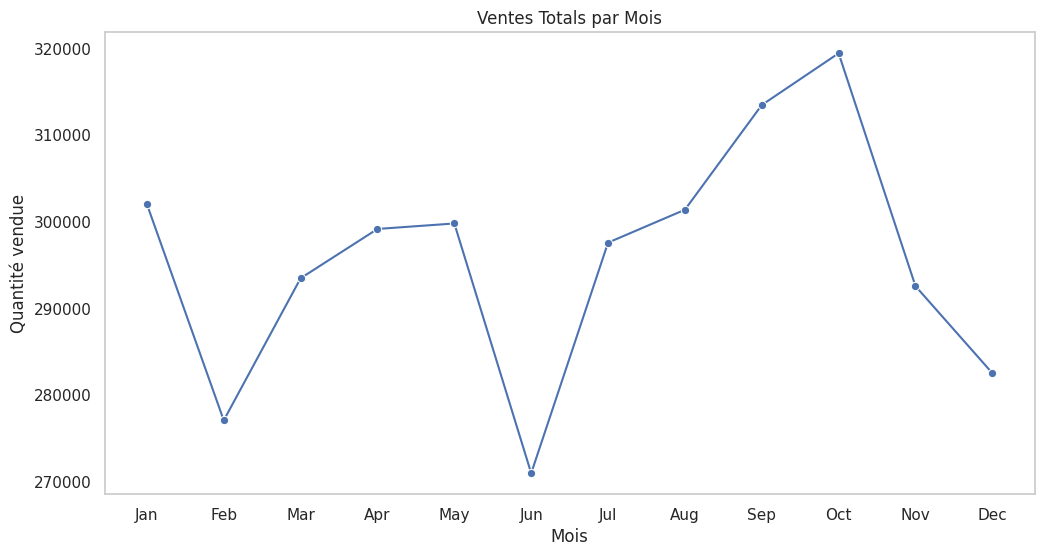

In [ ]:
#Extraction des mois de la date des ventes
sales_df['Mois'] = pd.to_datetime(sales_df['Date']).dt.month

#ventes par mois
monthly_sales = sales_df.groupby('Mois')['Quantité vendue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Mois', y='Quantité vendue', data=monthly_sales, marker='o')
plt.title('Ventes Totals par Mois')
plt.xlabel('Mois')
plt.ylabel('Quantité vendue')
plt.grid()
plt.xticks(monthly_sales['Mois'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

***Rapport d'Exploration pour le Data Scientist***




```
1. Interprétation des résultats
a. Impact des conditions météorologiques

    Observation : Les températures et les précipitations n'ont pas d'impact significatif sur les ventes.
    Implication : Cela suggère que les ventes sont probablement influencées par d'autres facteurs, comme les promotions, la saisonnalité, ou des événements locaux. Il pourrait être judicieux de se concentrer sur ces éléments dans le modèle prédictif.

b. Promotions

    Observation : Tous les articles ont été vendus hors promotions.
    Implication : Cela indique que la demande pour ces produits est suffisamment forte sans avoir besoin de promotions. Cela pourrait signifier que les prix actuels sont compétitifs ou que la marque est suffisamment forte. Dans ce cas, il serait pertinent d'explorer comment introduire des promotions stratégiques pour augmenter les ventes, surtout pendant les mois où les ventes sont plus faibles.

c. Saison et ventes

    Observation : Les meilleures ventes ont eu lieu en janvier, septembre et octobre, tandis que les pires ventes ont été enregistrées en février, juin et décembre.
    Implication : Cette information peut être utilisée pour ajuster les niveaux de stock et planifier les achats. Par exemple, il serait judicieux d'augmenter les niveaux de stock avant janvier, septembre et octobre, tout en étant prudent dans l'approvisionnement pour février, juin et décembre.

2. Actions recommandées
a. Ajustement du modèle prédictif

    Variables à inclure : Étant donné que la météo n'a pas d'impact significatif, il serait préférable de ne pas inclure ces variables dans le modèle. Se concentrer sur des variables telles que :
        Mois (pour capturer la saisonnalité)
        Historique des ventes
        Éventuelles promotions futures

b. Stratégies de réapprovisionnement

    Planification proactive : Utiliser l'analyse saisonnière pour prévoir les besoins en stock :
        Augmenter le stock avant janvier, septembre et octobre.
        Réduire le stock ou ajuster les commandes pour février, juin et décembre.

c. Exploration de nouvelles promotions

    Tests de promotions : Bien qu'aucune vente n'ait été réalisée avec promotion jusqu'à présent, il pourrait être intéressant de tester des promotions ciblées pendant les mois moins performants (février, juin, décembre) pour stimuler la demande.
    Segmentation des clients : Analyser si certains segments de clients pourraient répondre positivement à des promotions spécifiques.

d. Suivi continu

    Analyse continue : Continuer à surveiller l'impact des promotions et des changements dans la stratégie de réapprovisionnement pour affiner le modèle prédictif au fil du temps.
    Feedback des magasins : Recueillir régulièrement des retours d'expérience des responsables de magasin pour ajuster les prévisions basées sur leur connaissance du marché local.

3. Prochaines étapes

    Modélisation :
        Développer un modèle prédictif en intégrant uniquement les variables pertinentes identifiées lors de l'exploration.
        Tester différents algorithmes (régression linéaire, forêts aléatoires, etc.) pour déterminer lequel fonctionne le mieux avec les données.
    Validation du modèle :
        Utiliser une partie des données pour valider le modèle afin de s'assurer qu'il prédit correctement les besoins en articles et quantités.
    Implémentation :
        Déployer le modèle dans le système de gestion des stocks pour automatiser le processus d'approvisionnement basé sur les prévisions.
    Évaluation continue :
        Évaluer régulièrement la performance du modèle et apporter des ajustements basés sur les nouvelles données et tendances observées.

```



